# Packages Installs, imports, and presets

In [1]:
from scapy.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from collections import defaultdict
import os

In [2]:
df_train= pd.read_parquet('data/df_train_statistics.parquet')
df_validation = pd.read_parquet('data/df_validation_statistics.parquet')
df_test=pd.read_parquet('data/df_test_statistics.parquet')

In [3]:
df_train

,flow,src,src_port,dst,dst_port,feduration,total_fpackets,total_bpackets,total_fpktl,total_bpktl,...,fAvgSegmentSize,fAvgBytesPerBulk,fAvgPacketsPerBulk,fAvgBulkRate,bAvgSegmentSize,bAvgBytesPerBulk,bAvgPacketsPerBulk,bAvgBulkRate,label,computation_time
0,100_192.168.1.20_192.168.1.13_49259_2404_TCP_c...,192.168.1.13,0,192.168.1.20,0,0.001172,1,1,208,208,...,168.0,208.000000,1.0,0.666667,168.0,0,1.0,0.666667,1,0.426015
0,100_192.168.1.20_192.168.1.13_49368_2404_TCP_c...,192.168.1.13,0,192.168.1.20,0,0.001556,3,3,624,624,...,168.0,312.000000,2.0,0.571429,168.0,0,2.0,0.571429,1,0.424216
0,100_192.168.1.20_192.168.1.13_49403_2404_TCP_c...,192.168.1.13,0,192.168.1.20,0,0.002680,3,3,624,624,...,168.0,312.000000,2.0,0.571429,168.0,0,2.0,0.571429,1,0.411320
0,100_192.168.1.20_192.168.1.13_49604_2404_TCP_c...,192.168.1.13,0,192.168.1.20,0,0.000692,1,1,208,208,...,168.0,208.000000,1.0,0.666667,168.0,0,1.0,0.666667,1,0.400727
0,100_192.168.1.20_192.168.1.13_49672_2404_TCP_c...,192.168.1.13,0,192.168.1.20,0,0.005329,6,5,1248,1040,...,168.0,356.571429,3.5,0.583333,168.0,0,3.0,0.500000,1,0.438520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,9_192.168.1.29_192.168.1.19_36769_2404_TCP_c_s...,192.168.1.19,0,192.168.1.29,0,1.000000,1,0,208,0,...,168.0,0.000000,0.0,0.000000,NaN,0,0.0,0.000000,6,1.292402
0,9_192.168.1.29_192.168.1.19_43749_2404_TCP_c_r...,192.168.1.19,0,192.168.1.29,0,0.000604,2,0,416,0,...,168.0,0.000000,0.0,0.000000,NaN,0,0.0,0.000000,0,1.344020
0,9_192.168.1.29_192.168.1.19_45265_2404_TCP_c_s...,192.168.1.29,0,192.168.1.19,0,0.001995,1,4,208,832,...,168.0,208.000000,1.0,0.333333,168.0,0,2.5,0.833333,5,1.383103
0,9_192.168.1.29_192.168.1.22_37147_2404_TCP_c_c...,192.168.1.22,0,192.168.1.29,0,1.000000,1,0,208,0,...,168.0,0.000000,0.0,0.000000,NaN,0,0.0,0.000000,10,1.315556


In [4]:
import sklearn

In [5]:
df_test=df_test.drop('flow',axis=1)
df_validation=df_validation.drop('flow',axis=1)
df_train=df_train.drop('flow',axis=1)



In [6]:
df_train.columns

Index(['src', 'src_port', 'dst', 'dst_port', 'feduration', 'total_fpackets',
       'total_bpackets', 'total_fpktl', 'total_bpktl', 'min_fpktl',
       'min_bpktl', 'max_fpktl', 'max_bpktl', 'mean_fpktl', 'mean_bpktl',
       'std_fpktl', 'std_bpktl', 'total_fiat', 'total_biat', 'min_fiat',
       'min_biat', 'max_fiat', 'max_biat', 'mean_fiat', 'mean_biat',
       'std_fiat', 'std_biat', 'fpsh_cnt', 'bpsh_cnt', 'furg_cnt', 'burg_cnt',
       'total_fhlen', 'total_bhlen', 'fPktsPerSecond', 'bPktsPerSecond',
       'flowPktsPerSecond', 'flowBytesPerSecond', 'min_flowpktl',
       'max_flowpktl', 'mean_flowpktl', 'std_flowpktl', 'min_flowiat',
       'max_flowiat', 'mean_flowiat', 'std_flowiat', 'flow_fin', 'flow_syn',
       'flow_rst', 'flow_psh', 'flow_ack', 'flow_urg', 'flow_cwr', 'flow_ece',
       'downUpRatio', 'avgPacketSize', 'fAvgSegmentSize', 'fAvgBytesPerBulk',
       'fAvgPacketsPerBulk', 'fAvgBulkRate', 'bAvgSegmentSize',
       'bAvgBytesPerBulk', 'bAvgPacketsPerBulk', 'bA

In [7]:
import feature_engine
import feature_engine.encoding

In [8]:
tmp = df_train.dtypes
tmp.loc[tmp=='object']

src    object
dst    object
dtype: object

In [9]:
oe = feature_engine.encoding.OrdinalEncoder(encoding_method='arbitrary')

In [10]:
df_train[['src','dst']]

,src,dst
0,192.168.1.13,192.168.1.20
0,192.168.1.13,192.168.1.20
0,192.168.1.13,192.168.1.20
0,192.168.1.13,192.168.1.20
0,192.168.1.13,192.168.1.20
...,...,...
0,192.168.1.19,192.168.1.29
0,192.168.1.19,192.168.1.29
0,192.168.1.29,192.168.1.19
0,192.168.1.22,192.168.1.29


In [11]:
oe.fit(df_train[['src','dst']])
df_train[['src','dst']]=oe.transform(df_train[['src','dst']])

In [12]:
df_validation[['src','dst']]=oe.transform(df_validation[['src','dst']])
df_test[['src','dst']]=oe.transform(df_test[['src','dst']])

In [13]:
oe = feature_engine.encoding.OrdinalEncoder()

In [14]:
tmp = df_train.isnull().sum()
tmp.loc[tmp>0]

mean_bpktl         2126
std_fpktl          6739
std_bpktl          7849
mean_fiat          6739
mean_biat          7849
std_fiat           8414
std_biat           8401
std_flowpktl       1015
mean_flowiat       1015
std_flowiat        7305
bAvgSegmentSize    2126
dtype: int64

In [15]:
columns_with_nan_values = list(tmp.loc[tmp>0].index)

In [16]:
import feature_engine.imputation
mmi = feature_engine.imputation.MeanMedianImputer()
mmi.fit(df_train[columns_with_nan_values])

MeanMedianImputer()

In [17]:

df_train[columns_with_nan_values]=mmi.transform(df_train[columns_with_nan_values])
df_test[columns_with_nan_values]=mmi.transform(df_test[columns_with_nan_values])
df_validation[columns_with_nan_values]=mmi.transform(df_validation[columns_with_nan_values])

In [18]:
X_train = df_train.loc[:,df_train.columns != 'label']
y_train = df_train.loc[:,df_train.columns == 'label'].to_numpy().flatten()

In [19]:
X_test = df_test.loc[:,df_test.columns != 'label']
y_test = df_test.loc[:,df_test.columns == 'label'].to_numpy().flatten()

In [20]:
X_val = df_validation.loc[:,df_validation.columns != 'label']
y_val = df_validation.loc[:,df_validation.columns == 'label'].to_numpy().flatten()

/home/hwerneck/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
54 fits failed out of a total of 162.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/hwerneck/miniconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/hwerneck/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/hwerneck/miniconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  

RandomForestClassifier(max_depth=10)
AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=200)


/home/hwerneck/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DecisionTreeClassifier(criterion='entropy', max_depth=10)
           Model                                    Best Parameters  Accuracy  \
0  Random Forest  {'max_depth': 10, 'max_features': 'sqrt', 'n_e...  0.753433   
1       Adaboost        {'learning_rate': 0.1, 'n_estimators': 200}  0.717541   
2  Decision Tree          {'criterion': 'entropy', 'max_depth': 10}  0.714003   

   Precision    Recall                                   Confusion Matrix  
0   0.330500  0.325573  [[32, 0, 3, 120, 5, 5, 48, 76, 5, 11, 1], [0, ...  
1   0.169396  0.240928  [[0, 0, 0, 205, 0, 77, 1, 0, 0, 23, 0], [0, 61...  
2   0.284547  0.262744  [[1, 0, 3, 0, 2, 3, 7, 166, 92, 23, 9], [0, 62...  


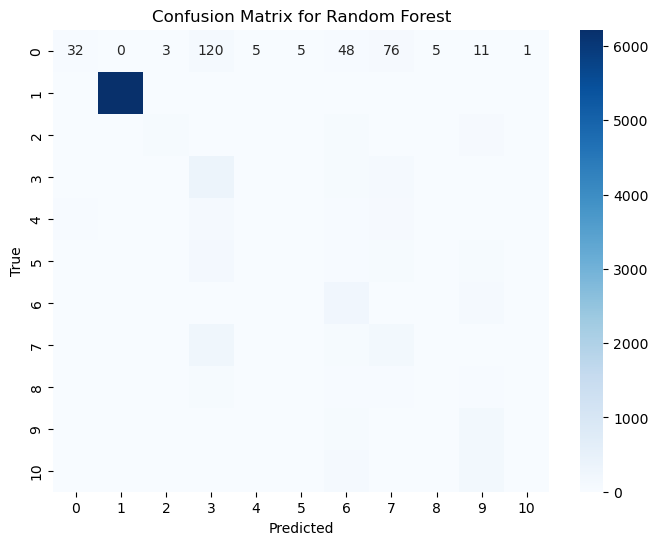

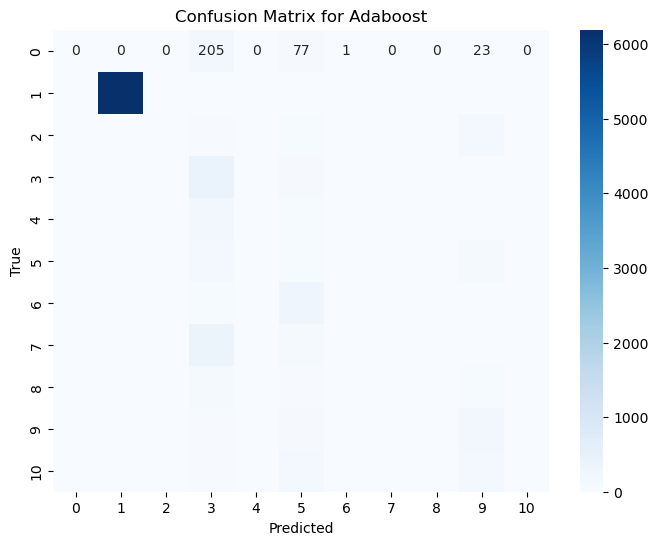

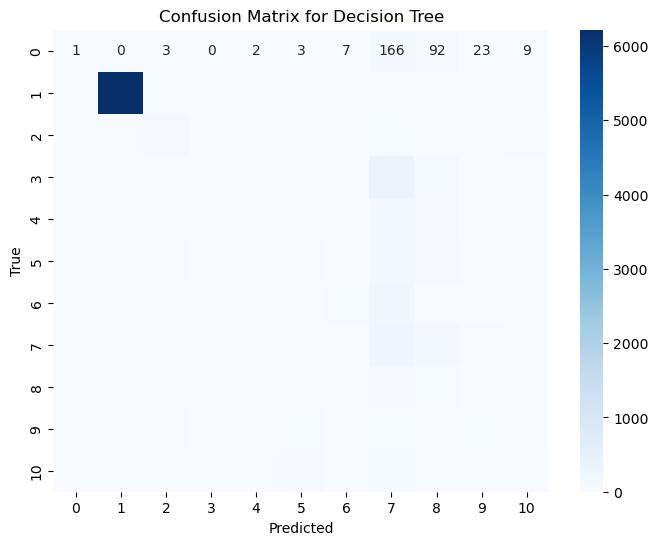

In [21]:
import pandas as pd
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare a list of models to compare with their corresponding hyperparameter grids
models = {
    # "Logistic Regression": (LogisticRegression(max_iter=1000), {
    #     'C': [0.1, 1, 10, 100],
    #     'solver': ['liblinear', 'saga']
    # }),
    # "Linear Discriminant Analysis": (LinearDiscriminantAnalysis(), {
    #     'solver': ['svd', 'lsqr', 'eigen']
    # }),
    # "Quadratic Discriminant Analysis": (QuadraticDiscriminantAnalysis(), {
    #     'reg_param': [0.0, 0.1, 0.5, 1.0]
    # }),

    # "Naive Bayes": (GaussianNB(), {
    #     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    # }),
    # "SVM": (SVC(probability=True), {
    #     'C': [0.1, 1, 10, 100],
    #     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    # }),
    "Random Forest": (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [None, 10, 20, 30, 40, 50]
    }),
    "Adaboost": (AdaBoostClassifier(algorithm='SAMME'), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0, 10.0]
    }),
    # "MLP": (MLPClassifier(max_iter=1000), {
    #     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    #     'activation': ['tanh', 'relu'],
    #     'solver': ['sgd', 'adam'],
    #     'alpha': [0.0001, 0.001, 0.01]
    # }),
        "Decision Tree": (DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30, 40, 50]
    }),
}

# Train and evaluate models using HalvingGridSearchCV
results = []

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=16)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(best_model)
    best_model.fit(X_train, y_train)
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        "Model": name,
        "Best Parameters": grid_search.best_params_,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Confusion Matrix": cm
    })

# Convert results to a DataFrame
df_results = pd.DataFrame(results)

# Print the results
print(df_results)

# Plot confusion matrices for each model
for result in results:
    cm = result["Confusion Matrix"]
    model_name = result["Model"]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [22]:
display(df_results)

,Model,Best Parameters,Accuracy,Precision,Recall,Confusion Matrix
0,Random Forest,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.753433,0.330500,0.325573,"[[32, 0, 3, 120, 5, 5, 48, 76, 5, 11, 1], [0, ..."
1,Adaboost,"{'learning_rate': 0.1, 'n_estimators': 200}",0.717541,0.169396,0.240928,"[[0, 0, 0, 205, 0, 77, 1, 0, 0, 23, 0], [0, 61..."
2,Decision Tree,"{'criterion': 'entropy', 'max_depth': 10}",0.714003,0.284547,0.262744,"[[1, 0, 3, 0, 2, 3, 7, 166, 92, 23, 9], [0, 62..."
